In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [4]:
file_path = "C:/Users/HP/Downloads/archive (2)/cardio_train.csv"

cvd_data = pd.read_csv(file_path , sep= ';')
cvd_data.head(5)
#df = pd.read_csv(file_path)
#df.columns
#df




,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
cvd_data.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
cvd_data.shape

(70000, 13)

In [9]:
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
cvd_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
cvd_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


INSIGHTS FROM THE DESCRIPTION ABOVE

Minimum values of systolic and diastolic bp shouldn't be negative
Maximum valus shouln't be up to 16020 and 11000 respectively

In [13]:
cvd_data.duplicated().sum()

np.int64(0)

In [14]:
cvd_data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [20]:
#converting Age from days to years
cvd_data['age_years'] = cvd_data['age']/365

Features:

Age | Objective Feature | age | int (days) Height | Objective Feature | height | int (cm) | Weight | Objective Feature | weight | float (kg) | Gender | Objective Feature | gender | categorical code | Systolic blood pressure | Examination Feature | ap_hi | int | Diastolic blood pressure | Examination Feature | ap_lo | int | Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | Smoking | Subjective Feature | smoke | binary | Alcohol intake | Subjective Feature | alco | binary | Physical activity | Subjective Feature | active | binary | Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Refer to df.head() above for better interpretation

EXPLORATORY DATA ANALYSIS

In [15]:
# import visaulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

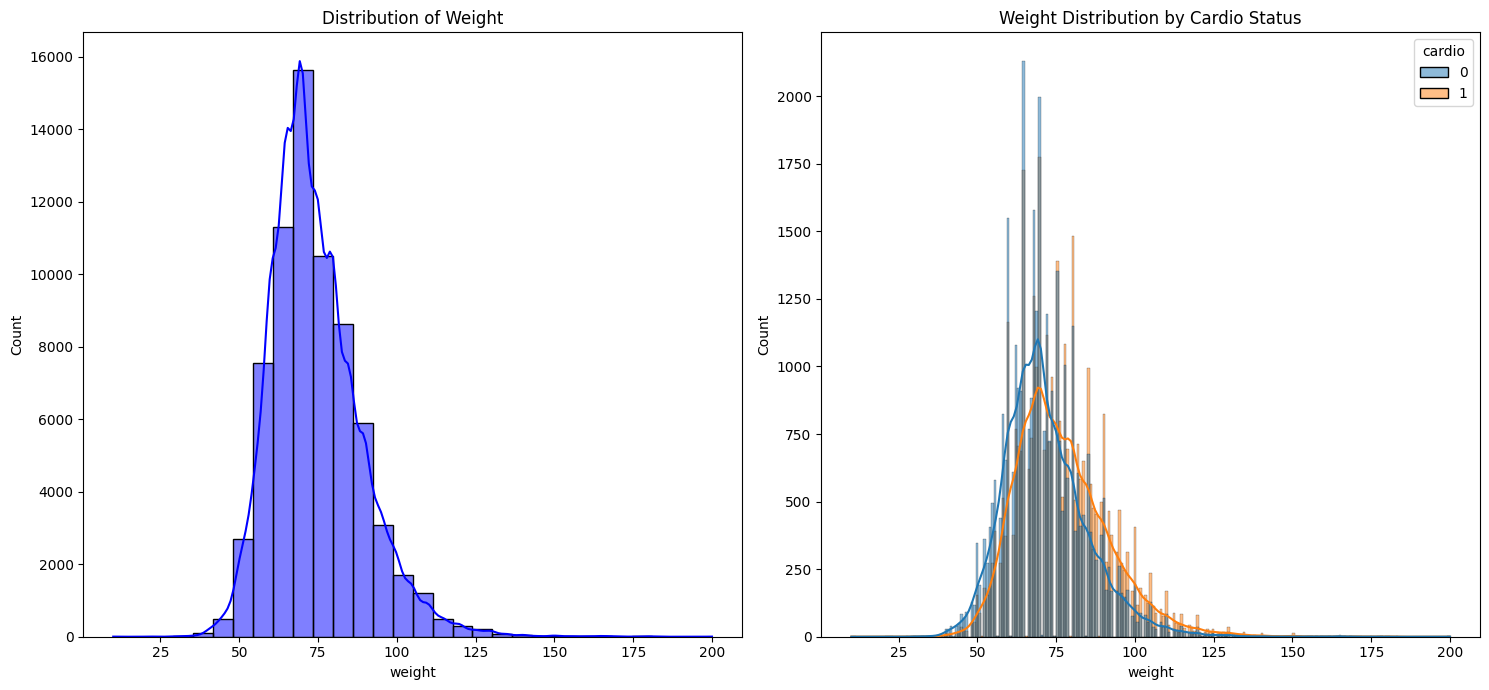

In [16]:

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of weight (green)
sns.histplot(data=cvd_data, x='weight', bins=30, kde=True, color='b', ax=axs[0])
axs[0].set_title('Distribution of Weight')

# Plot 2: Weight distribution by cardio class (hue)
sns.histplot(data=cvd_data, x='weight', kde=True, hue='cardio', ax=axs[1])
axs[1].set_title('Weight Distribution by Cardio Status')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

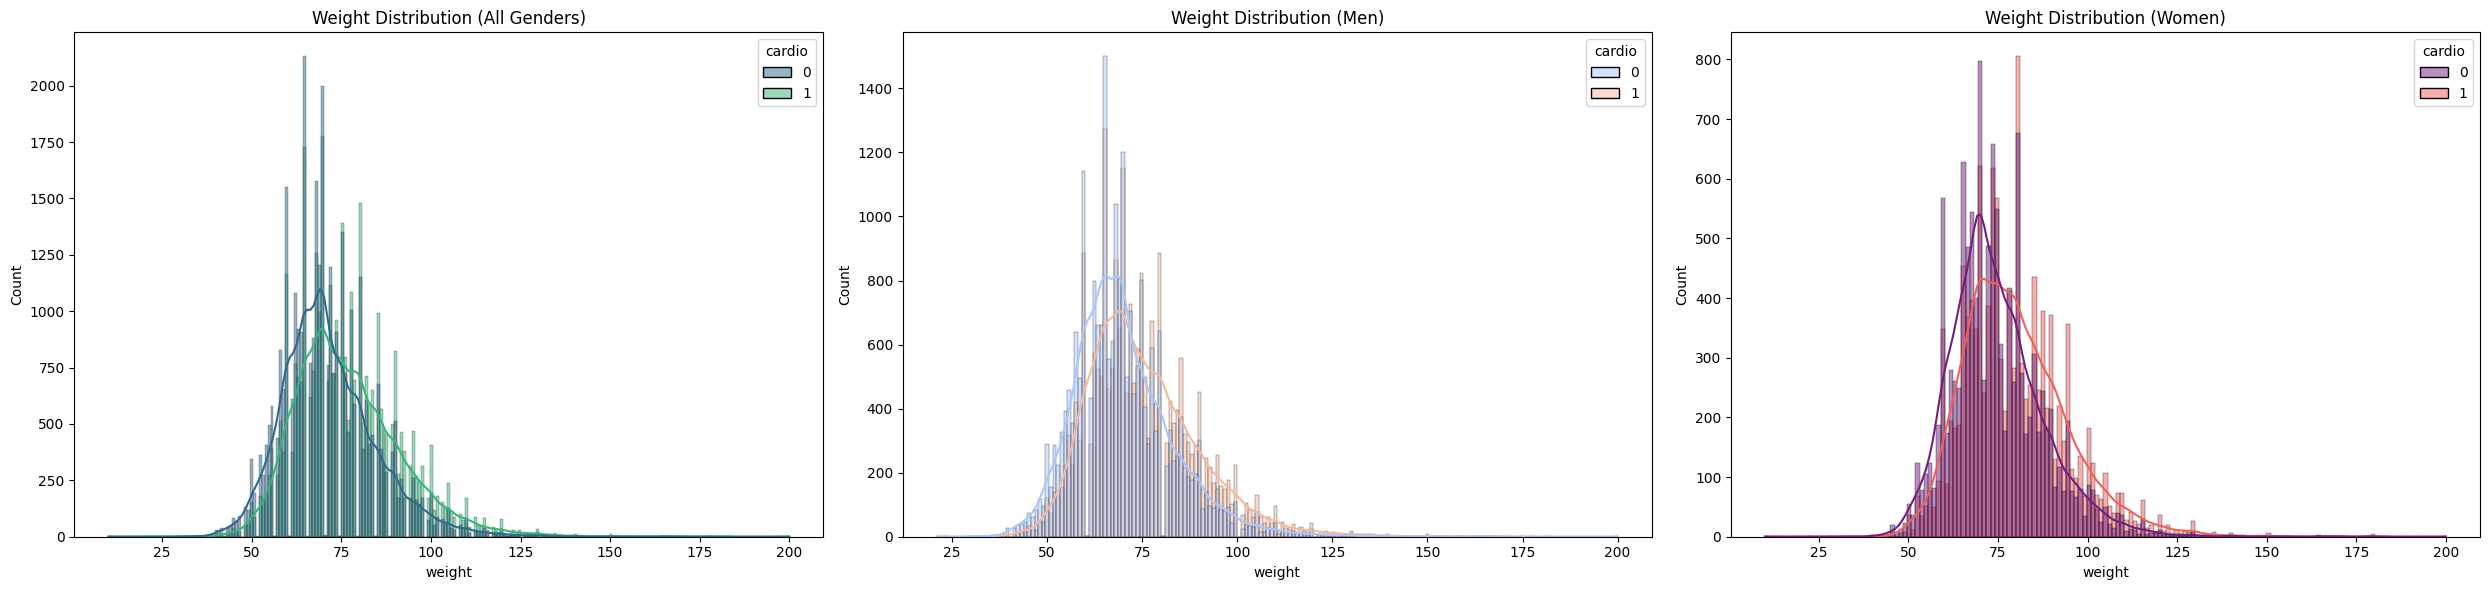

In [17]:
plt.figure(figsize=(25, 6))  # Set overall figure size

# Subplot 1: All Genders
plt.subplot(1, 3, 1)  # 1 row, 3 cols, position 1
sns.histplot(data=cvd_data, x='weight', kde=True, hue='cardio', palette='viridis')
plt.title('Weight Distribution (All Genders)')

# Subplot 2: Gender = 1 (Men)
plt.subplot(1, 3, 2)  # Position 2
sns.histplot(data=cvd_data[cvd_data['gender'] == 1], x='weight', kde=True, hue='cardio', palette='coolwarm')
plt.title('Weight Distribution (Men)')

# Subplot 3: Gender = 2 (Women)
plt.subplot(1, 3, 3)  # Position 3
sns.histplot(data=cvd_data[cvd_data['gender'] == 2], x='weight', kde=True, hue='cardio', palette='magma')
plt.title('Weight Distribution (Women)')

plt.tight_layout()  # Prevent overlapping
plt.show()

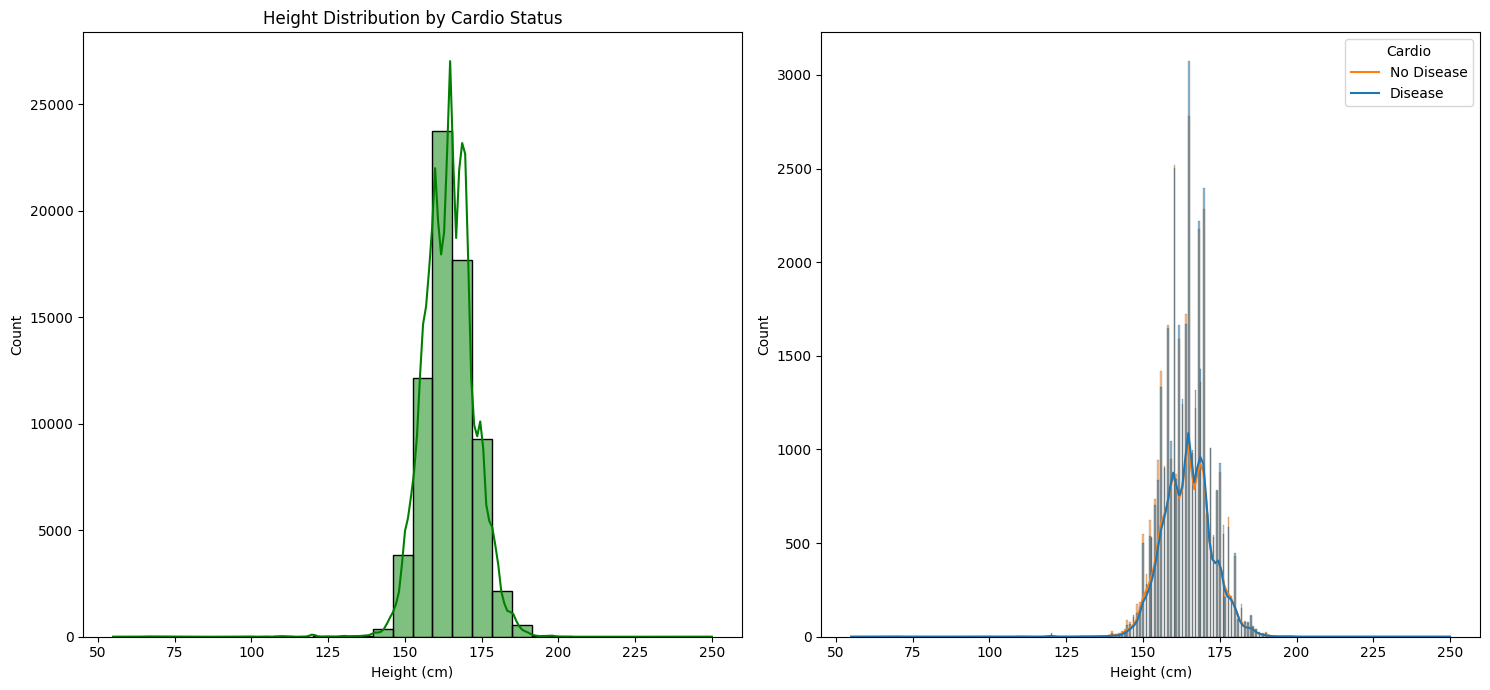

In [18]:
# 1. Create a 1x2 subplot grid and set figure size
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 2. First subplot: Height distribution (all patients)
sns.histplot(data=cvd_data, x='height', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Height Distribution (All Patients)')
axs[0].set_xlabel('Height (cm)')

# 3. Second subplot: Height distribution by cardio status
sns.histplot(data=cvd_data, x='height', kde=True, hue='cardio', ax=axs[1])
axs[0].set_title('Height Distribution by Cardio Status')
axs[1].set_xlabel('Height (cm)')
axs[1].legend(title='Cardio', labels=['No Disease', 'Disease'])

# 4. Adjust layout and display
plt.tight_layout()
plt.show()

Insights

Higher weight is associated with cardiovascular diseases, and simalr for all genders
Height does not influence incidence of cardiovascular diseases

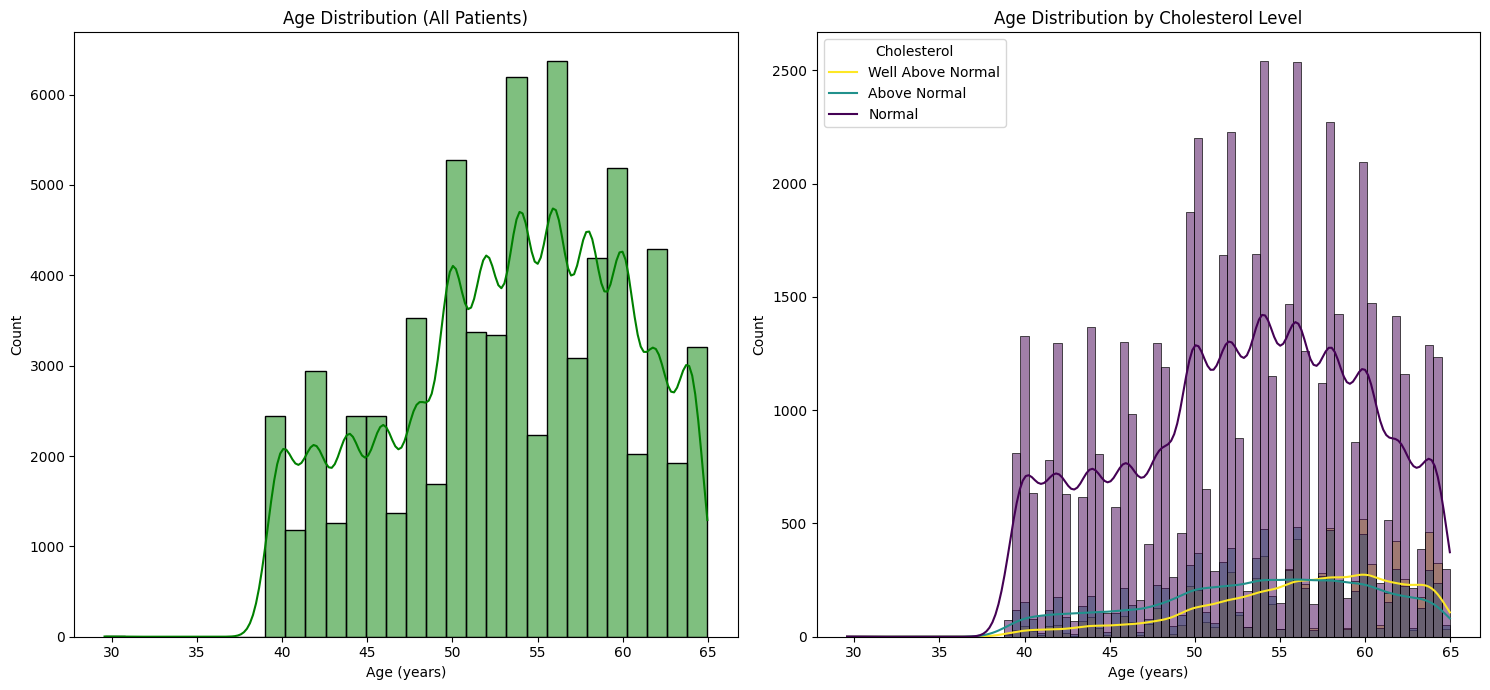

In [21]:
#Converting age in days to years
age_years = cvd_data['age']/365
# Create figure and subplot grid (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Age distribution (all patients)
sns.histplot(data=cvd_data, x='age_years', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Age Distribution (All Patients)')
axs[0].set_xlabel('Age (years)')

# Second subplot: Age distribution by cholesterol level
sns.histplot(data=cvd_data, x='age_years', kde=True, hue='cholesterol', palette='viridis', ax=axs[1])
axs[1].set_title('Age Distribution by Cholesterol Level')
axs[1].set_xlabel('Age (years)')
axs[1].legend(title='Cholesterol', 
             labels=['Well Above Normal', 'Above Normal', 'Normal'])

# Adjust layout and display
plt.tight_layout()
plt.show()

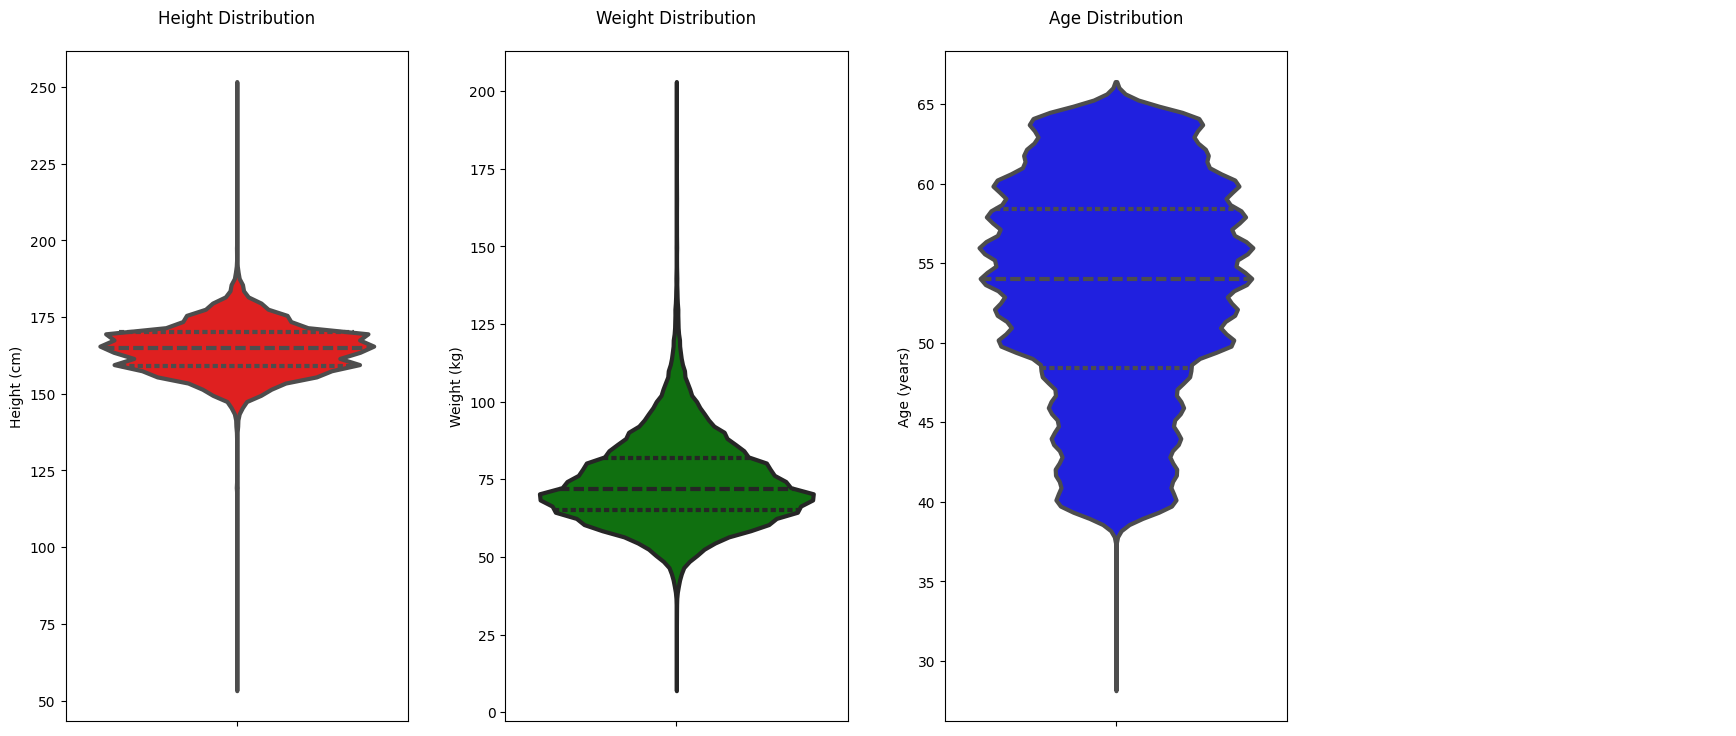

In [22]:
# Set up the figure and subplots
plt.figure(figsize=(18, 8))
#Converting age in days to years
age_years = cvd_data['age']/365

# 1. Height Violin Plot
plt.subplot(1, 4, 1)
sns.violinplot(y='height', data=cvd_data, color='red', linewidth=3, inner='quartile')
plt.title('Height Distribution', fontsize=12, pad=20)
plt.ylabel('Height (cm)', fontsize=10)

# 2. Weight Violin Plot
plt.subplot(1, 4, 2)
sns.violinplot(y='weight', data=cvd_data, color='green', linewidth=3, inner='quartile')
plt.title('Weight Distribution', fontsize=12, pad=20)
plt.ylabel('Weight (kg)', fontsize=10)

# 3. Age Violin Plot
plt.subplot(1, 4, 3)
sns.violinplot(y='age_years', data=cvd_data, color='blue', linewidth=3, inner='quartile')
plt.title('Age Distribution', fontsize=12, pad=20)
plt.ylabel('Age (years)', fontsize=10)

# 4. Empty subplot for legend/space
plt.subplot(1, 4, 4)
plt.axis('off')  # Hide axes for the empty subplot

# Adjust layout and display
plt.tight_layout(pad=3)
plt.show()

Insight:

most of the height lies between 140 and 185
most of the weight lies between 40 and 115
most of the ages lies between 38 and 68 years

FEATURE ENGINEERING

Handling skewed data and outliers

In [23]:
# separate categorical data from numerical data
category = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cat_data = cvd_data[category]
cat_data

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
69995,2,1,1,1,0,1,0
69996,1,2,2,0,0,1,1
69997,2,3,1,0,1,0,1
69998,1,1,2,0,0,0,1


In [24]:
# We create an dataframe to add and test run our new features
numeric = ['age', 'height', 'weight','ap_hi', 'ap_lo']
num_data = cvd_data[numeric]
num_data

,age,height,weight,ap_hi,ap_lo
0,18393,168,62.0,110,80
1,20228,156,85.0,140,90
2,18857,165,64.0,130,70
3,17623,169,82.0,150,100
4,17474,156,56.0,100,60
...,...,...,...,...,...
69995,19240,168,76.0,120,80
69996,22601,158,126.0,140,90
69997,19066,183,105.0,180,90
69998,22431,163,72.0,135,80



View your numerical data and create normally distributed dataset

In [25]:
# create the list of numeric columns
subjective = ['age', 'height', 'weight']

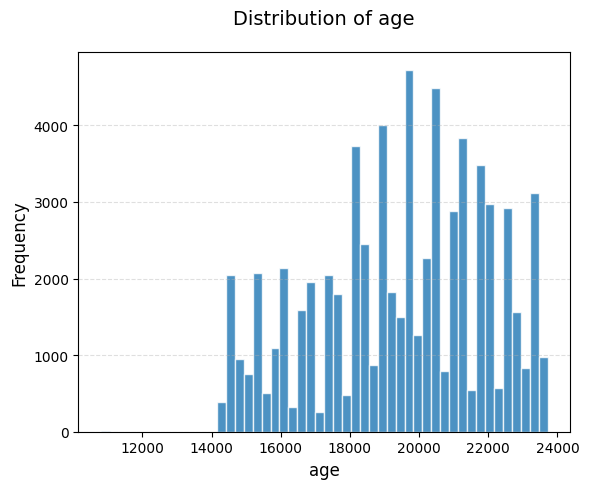

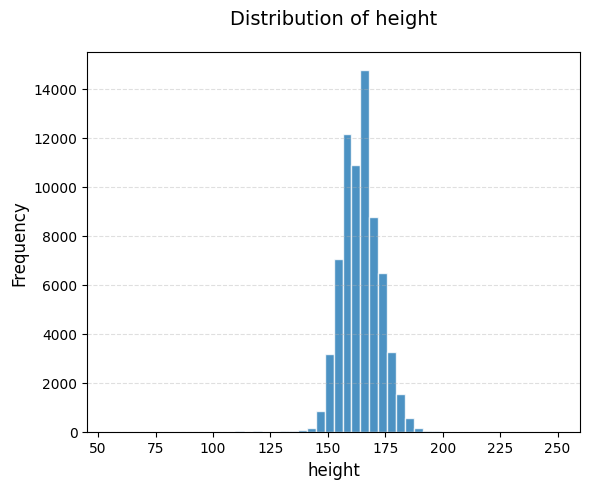

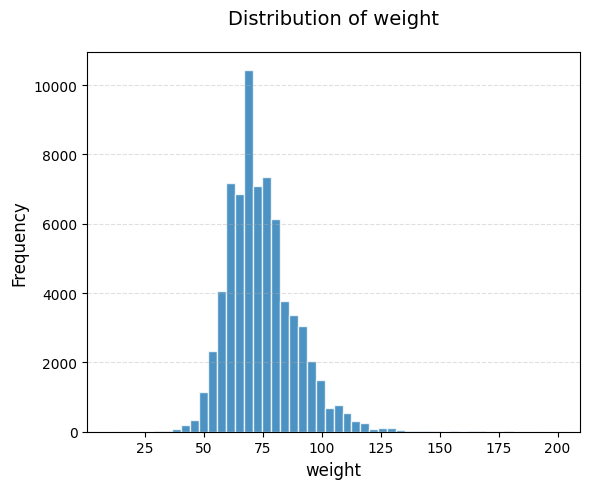

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for better visuals
#plt.style.use('seaborn')

# Loop through columns and plot
for col in subjective:
    # Create figure with adjusted size
    plt.figure(figsize=(6, 5))
    
    # Plot histogram with customization
    plt.hist(num_data[col], 
             bins=50,
             color='#1f77b4',  # Matplotlib default blue
             edgecolor='white',
             alpha=0.8)
    
    # Add labels and title
    plt.title(f'Distribution of {col}', fontsize=14, pad=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add grid and adjust layout
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    
    plt.show()

Insight

The height is normally ditributed
The weight is slightly skewed to the right
The Age is normal

Previously, we found out that there are some large vaLues in ap_hi and ap_lo columns and also negative values. Now, we need to handle it.

In [30]:
# check columns with negative values of ap_hi (diastole)
num_data[num_data['ap_hi'] < 0]

,age,height,weight,ap_hi,ap_lo
4607,15281,165,78.0,-100,80
16021,22108,161,90.0,-115,70
20536,15581,153,54.0,-100,70
23988,18301,162,74.0,-140,90
25240,14711,168,50.0,-120,80
35040,23325,168,59.0,-150,80
46627,23646,160,59.0,-120,80


In [31]:
# change all the negative values to positive
for values in range(0, len(num_data)):
    if num_data['ap_hi'][values] < 0:
        num_data['ap_hi'][values] = num_data['ap_hi'][values] * -1

# check if we still have negative values
num_data[num_data['ap_hi'] < 0]

,age,height,weight,ap_hi,ap_lo


In [32]:
# check columns with negative values of ap_lo (systole)
num_data[num_data['ap_lo'] < 0]

,age,height,weight,ap_hi,ap_lo
60106,22571,167,74.0,15,-70


In [33]:
# change all the negative values to positive
for values in range(0, len(num_data)):
    if num_data['ap_lo'][values] < 0:
        num_data['ap_lo'][values] = num_data['ap_lo'][values] * -1

# check if we still have negative values
num_data[num_data['ap_lo'] < 0]

,age,height,weight,ap_hi,ap_lo


Handling outliers with IQR (interquatile range)

In [34]:
# calculate interquartile range
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 -Q1
IQR

age       3663.0
height      11.0
weight      17.0
ap_hi       20.0
ap_lo       10.0
dtype: float64

In [35]:
# Get outliers
upper = (num_data > (Q3 + 1.5*IQR))
lower = (num_data < (Q1 - 1.5*IQR))
outliers = upper | lower
outliers.sum()

age          4
height     519
weight    1819
ap_hi     1428
ap_lo     4631
dtype: int64

In [36]:
# Iterate through Q1, Q3 values and column names simultaneously
for Q1, Q3, column in zip(Q1, Q3, num_data.columns):
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Cap upper outliers: Values > Q3 + 1.5*IQR are set to Q3 + 1.5*IQR
    num_data.loc[(num_data[column] > (Q3 + 1.5*IQR)), column] = Q3 + 1.5*IQR
    
    # Cap lower outliers: Values < Q1 - 1.5*IQR are set to Q1 - 1.5*IQR
    num_data.loc[(num_data[column] < (Q1 - 1.5*IQR)), column] = Q1 - 1.5*IQR

# Return the modified DataFrame with capped outliers
num_data

,age,height,weight,ap_hi,ap_lo
0,18393.0,168.0,62.0,110,80
1,20228.0,156.0,85.0,140,90
2,18857.0,165.0,64.0,130,70
3,17623.0,169.0,82.0,150,100
4,17474.0,156.0,56.0,100,65
...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80
69996,22601.0,158.0,107.5,140,90
69997,19066.0,183.0,105.0,170,90
69998,22431.0,163.0,72.0,135,80


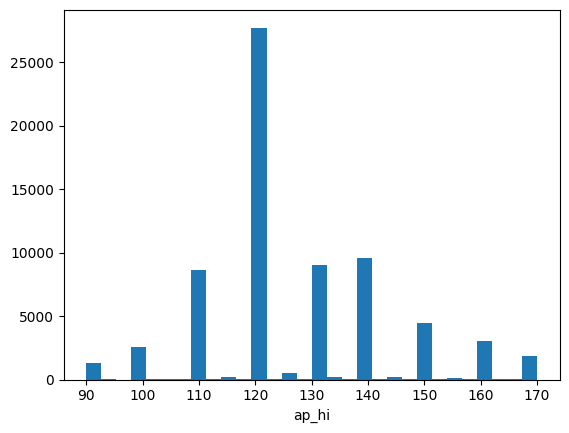

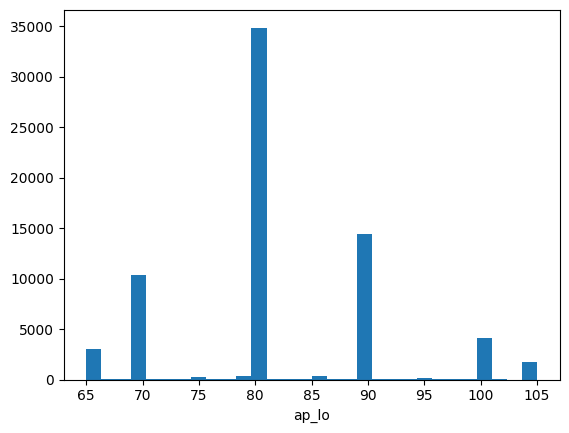

In [37]:
bp = ['ap_hi', 'ap_lo']
for columns in bp:
    plt.hist(num_data[columns], bins=30)
    plt.xlabel(columns)
    plt.show()

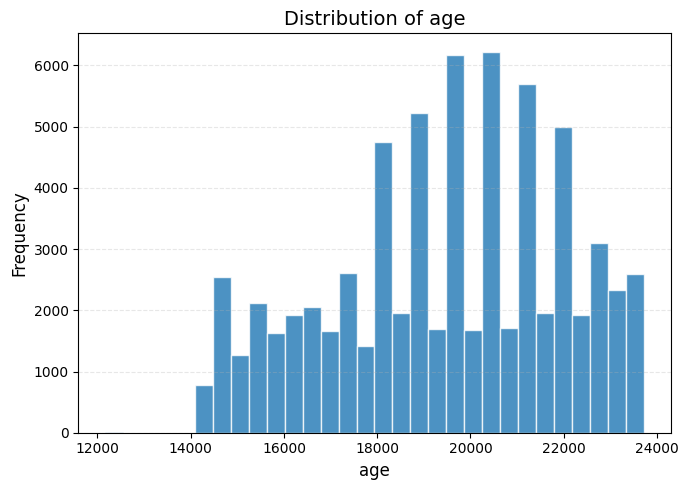

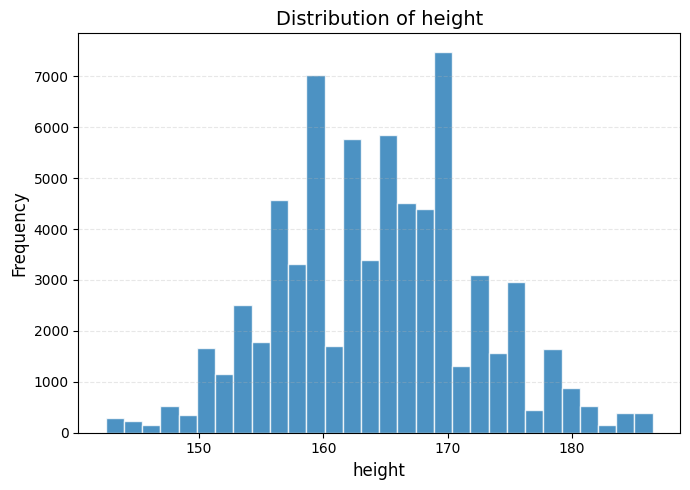

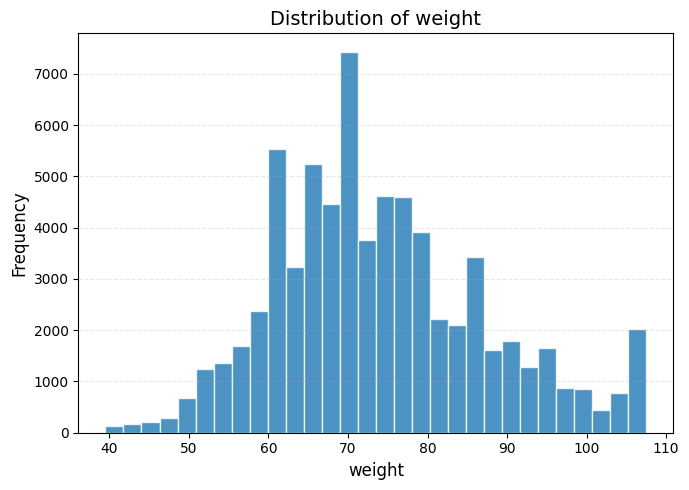

In [39]:
import matplotlib.pyplot as plt

# Set style for better visuals
#plt.style.use('seaborn')

# Loop through columns
for col in subjective:
    # Create figure
    plt.figure(figsize=(7, 5))
    
    # Create histogram with customizations
    plt.hist(num_data[col], 
             bins=30,
             color='#1f77b4',  # Nice blue color
             edgecolor='white', # White edges on bars
             alpha=0.8)        # Slight transparency
    
    # Add labels and title
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add grid lines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [40]:
# Add features using num_data

# add BMI
num_data['bmi'] = num_data['weight']/(num_data['height']/100)**2
num_data['age_year'] = num_data['age']/365
num_data['hypertensive'] = 0
num_data['age_group'] = 'none'
num_data['obesity'] = 0

# add hypertensive stage
for values in range(0, len(num_data)):
    if (num_data['ap_hi'][values] > 180) | (num_data['ap_lo'][values] > 120):
        num_data['hypertensive'][values] = 4
    elif (num_data['ap_hi'][values] > 139) | (num_data['ap_lo'][values] > 90):
        num_data['hypertensive'][values] = 3
    elif (num_data['ap_hi'][values] > 129) | (num_data['ap_lo'][values] > 80):
        num_data['hypertensive'][values] = 2
    elif (num_data['ap_hi'][values] > 119):
        num_data['hypertensive'][values] = 1
    else:
        num_data['hypertensive'][values] = 0
# add age group: children, youth, adult, elderly
for values in range(0, len(num_data)):
    if num_data['age_year'][values] < 15:
        num_data['age_group'][values] = 'children'
    elif num_data['age_year'][values] < 20:
        num_data['age_group'][values] = 'teenager'
    elif num_data['age_year'][values] < 40:
        num_data['age_group'][values] = 'youth'
    elif num_data['age_year'][values] < 60:
        num_data['age_group'][values] = 'middle_age'
    else:
        num_data['age_group'][values] = 'elderly'

# add obseity score
for values in range(0, len(num_data)):
    if num_data['bmi'][values] < 25:
        num_data['obesity'][values] = 0
    elif num_data['bmi'][values] < 30:
        num_data['obesity'][values] = 1
    elif num_data['bmi'][values] < 35:
        num_data['obesity'][values] = 2
    elif num_data['bmi'][values] < 40:
        num_data['obesity'][values] = 3
    else:
        num_data['obesity'][values] = 4

num_data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group,obesity
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,middle_age,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,middle_age,2
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,middle_age,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,middle_age,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,middle_age,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,middle_age,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,elderly,4
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,middle_age,2
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,elderly,1


In [41]:
import pandas as pd

# Calculate BMI and age in years
num_data['bmi'] = num_data['weight'] / (num_data['height'] / 100) ** 2
num_data['age_year'] = num_data['age'] / 365

# Add hypertensive stage using vectorized conditions
conditions = [
    (num_data['ap_hi'] > 180) | (num_data['ap_lo'] > 120),
    (num_data['ap_hi'] > 139) | (num_data['ap_lo'] > 90),
    (num_data['ap_hi'] > 129) | (num_data['ap_lo'] > 80),
    (num_data['ap_hi'] > 119),
    True  # Default case
]
choices = [4, 3, 2, 1, 0]
num_data['hypertensive'] = np.select(conditions, choices)

# Add age groups using pd.cut()
bins = [0, 15, 20, 40, 60, float('inf')]
labels = ['children', 'teenager', 'youth', 'middle_age', 'elderly']
num_data['age_group'] = pd.cut(num_data['age_year'], bins=bins, labels=labels, right=False)

# Add obesity score using pd.cut()
bmi_bins = [0, 25, 30, 35, 40, float('inf')]
bmi_labels = [0, 1, 2, 3, 4]
num_data['obesity'] = pd.cut(num_data['bmi'], bins=bmi_bins, labels=bmi_labels, right=False).astype(int)

num_data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,age_group,obesity
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,middle_age,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,middle_age,2
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,middle_age,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,middle_age,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,middle_age,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,middle_age,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,elderly,4
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,middle_age,2
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,elderly,1


In [42]:
num_data['age_group'].unique()

['middle_age', 'elderly', 'youth']
Categories (5, object): ['children' < 'teenager' < 'youth' < 'middle_age' < 'elderly']

In [43]:
# encode the category in num_data
num_data = pd.get_dummies(num_data, dtype = int)
num_data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,obesity,age_group_children,age_group_teenager,age_group_youth,age_group_middle_age,age_group_elderly
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,0,0,1,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,2,0,0,0,1,0
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,0,0,1,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,1,0,0,0,1,0
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,1,0,0,0,1,0
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,4,0,0,0,0,1
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,2,0,0,0,1,0
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,1,0,0,0,0,1


In [44]:
print(num_data.columns.tolist())

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_year', 'hypertensive', 'obesity', 'age_group_children', 'age_group_teenager', 'age_group_youth', 'age_group_middle_age', 'age_group_elderly']


In [45]:
print(cat_data.columns.tolist())

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [46]:
print(cat_data.head(5))

   gender  cholesterol  gluc  smoke  alco  active  cardio
0       2            1     1      0     0       1       0
1       1            3     1      0     0       1       1
2       1            3     1      0     0       0       1
3       2            1     1      0     0       1       1
4       1            1     1      0     0       0       0


In [48]:
# 1. First check if gender column exists
if 'gender' in cat_data.columns:
    # 2. Convert numeric to labels (only if values are 1/2)
    cat_data['gender'] = cat_data['gender'].map({'Female': 1 , 'Male': 2})
    

    
else:
    print("Warning: 'gender' column not found - skipping processing")

# Show result
print(cat_data.head())

   gender  cholesterol  gluc  smoke  alco  active  cardio
0       2            1     1      0     0       1       0
1       1            3     1      0     0       1       1
2       1            3     1      0     0       0       1
3       2            1     1      0     0       1       1
4       1            1     1      0     0       0       0


In [49]:
cat_data = pd.get_dummies(cat_data, dtype = int)

cat_data

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...
69995,2,1,1,1,0,1,0
69996,1,2,2,0,0,1,1
69997,2,3,1,0,1,0,1
69998,1,1,2,0,0,0,1


Joining the both the categorical data and numeric data into a single table

In [51]:
#Visualizing old data table
cvd_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


In [52]:
# new data
data = pd.concat([num_data,cat_data], axis =1)
data

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,obesity,age_group_children,...,age_group_youth,age_group_middle_age,age_group_elderly,gender,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,...,0,1,0,2,1,1,0,0,1,0
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,2,0,...,0,1,0,1,3,1,0,0,1,1
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,...,0,1,0,1,3,1,0,0,0,1
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,1,0,...,0,1,0,2,1,1,0,0,1,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,...,0,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,1,0,...,0,1,0,2,1,1,1,0,1,0
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,4,0,...,0,0,1,1,2,2,0,0,1,1
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,2,0,...,0,1,0,2,3,1,0,1,0,1
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,1,0,...,0,0,1,1,1,2,0,0,0,1


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
features = data.drop('cardio', axis = 1)
target = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
features

,age,height,weight,ap_hi,ap_lo,bmi,age_year,hypertensive,obesity,age_group_children,age_group_teenager,age_group_youth,age_group_middle_age,age_group_elderly,gender,cholesterol,gluc,smoke,alco,active
0,18393.0,168.0,62.0,110,80,21.967120,50.391781,0,0,0,0,0,1,0,2,1,1,0,0,1
1,20228.0,156.0,85.0,140,90,34.927679,55.419178,3,2,0,0,0,1,0,1,3,1,0,0,1
2,18857.0,165.0,64.0,130,70,23.507805,51.663014,2,0,0,0,0,1,0,1,3,1,0,0,0
3,17623.0,169.0,82.0,150,100,28.710479,48.282192,3,1,0,0,0,1,0,2,1,1,0,0,1
4,17474.0,156.0,56.0,100,65,23.011177,47.873973,0,0,0,0,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240.0,168.0,76.0,120,80,26.927438,52.712329,1,1,0,0,0,1,0,2,1,1,1,0,1
69996,22601.0,158.0,107.5,140,90,43.062009,61.920548,3,4,0,0,0,0,1,1,2,2,0,0,1
69997,19066.0,183.0,105.0,170,90,31.353579,52.235616,3,2,0,0,0,1,0,2,3,1,0,1,0
69998,22431.0,163.0,72.0,135,80,27.099251,61.454795,2,1,0,0,0,0,1,1,1,2,0,0,0


In [56]:
target

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

Normalization using StandardScaler 

This is to prevent features with large ranges from dominating the learning process 



In [57]:
from sklearn.preprocessing import StandardScaler

#Standardizing the feature

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Selection Using ANOVA
This will help select most relevant feature for training the model

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA to select top k features
k = 3  # Select top 3 features
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = anova_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = anova_selector.transform(X_test_scaled)

# Get ANOVA F-scores for all features
anova_scores = anova_selector.scores_

# Map feature names to their ANOVA F-scores
feature_names = features.columns
anova_results = dict(zip(feature_names, anova_scores))

# Display ANOVA results
print("ANOVA F-scores for Features:")
for feature, score in anova_results.items():
    print(f"{feature}: {score:.2f}")

# Selected feature indices and names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]
print("\nSelected Features (Top k):", list(selected_features))

ANOVA F-scores for Features:
age: 3341.80
height: 7.55
weight: 1915.36
ap_hi: 13190.80
ap_lo: 8197.78
bmi: 2146.79
age_year: 3341.80
hypertensive: 14972.60
obesity: 1905.94
age_group_children: nan
age_group_teenager: nan
age_group_youth: 393.64
age_group_middle_age: 849.68
age_group_elderly: 1514.07
gender: 4.16
cholesterol: 2855.99
gluc: 473.14
smoke: 16.84
alco: 5.59
active: 55.52

Selected Features (Top k): ['ap_hi', 'ap_lo', 'hypertensive']


LINEAR PROGRESSION MODEL TRAINING 

In [60]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Defining features and target 
X = features[['ap_hi', 'ap_lo', 'hypertensive']]
y = target

#Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Split into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


#Predict and evaluate 
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE): 0.45
R-Squared (R²): 0.21


LOGISTIC REGRESSION MODEL TRAINING WITH STANDARDSCALING

Confusion Matrix:
[[5426 1562]
 [2499 4513]]


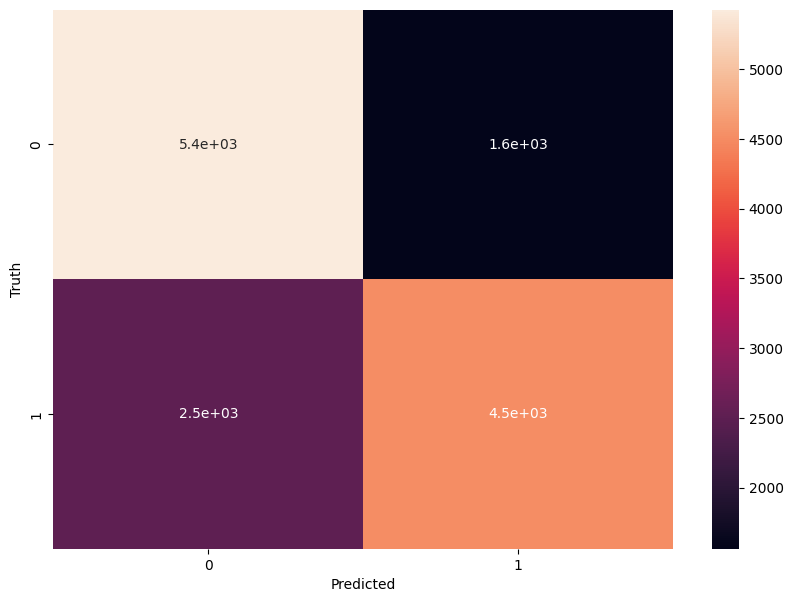

Accuracy: 0.71
Precision: 0.74
Recall: 0.64
F1-Score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      6988
           1       0.74      0.64      0.69      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [68]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm 
import seaborn as sns
from matplotlib import pyplot as plt 

#Define features and target
X = features[['ap_hi', 'ap_lo', 'hypertensive']]
y = target

#Normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Split into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the logistic regression model
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)
conf_matrix = sm.confusion_matrix(y_test, y_pred)
accuracy = sm.accuracy_score(y_test, y_pred)
precision = sm.precision_score(y_test, y_pred)
recall = sm.recall_score(y_test, y_pred)
f1 = sm.f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred))




LOGISTIC REGRESSION MODEL TRAINING WITHOUT STANDARDSCALING

Confusion Matrix:
[[5426 1562]
 [2499 4513]]


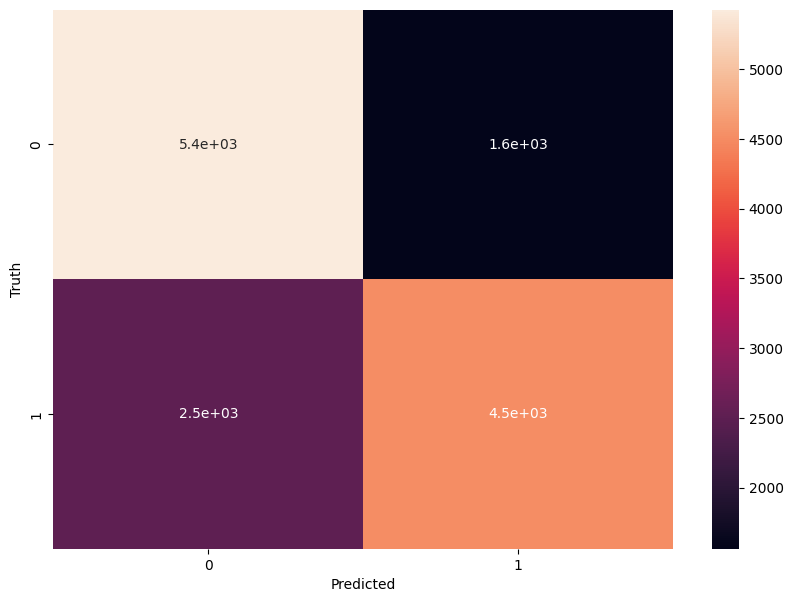

Accuracy: 0.71
Precision: 0.74
Recall: 0.64
F1-Score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      6988
           1       0.74      0.64      0.69      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [62]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm 
import seaborn as sns
from matplotlib import pyplot as plt 

#Define features and target
X = features[['ap_hi', 'ap_lo', 'hypertensive']]
y = target

#Normalization using StandardScaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)  # Scale all features
#X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
conf_matrix = sm.confusion_matrix(y_test, y_pred)
accuracy = sm.accuracy_score(y_test, y_pred)
precision = sm.precision_score(y_test, y_pred)
recall = sm.recall_score(y_test, y_pred)
f1 = sm.f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred))

CROSS VALIDATION

In [63]:
# Using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=10)
scores = scores.mean()
print(scores)

0.7104857142857143


DECISION TREE MODEL TRAINING 


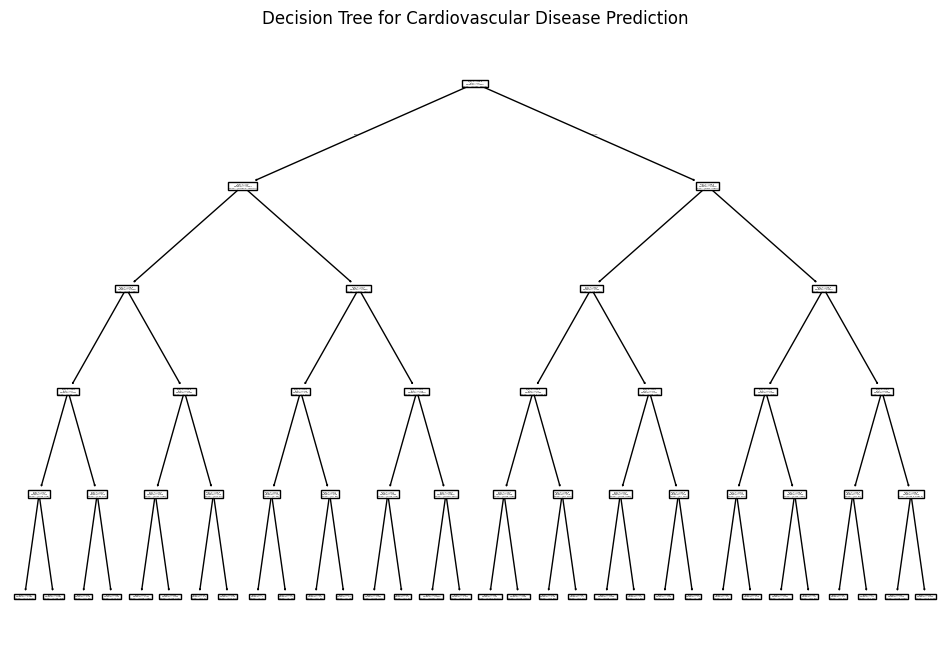

Mean CV Accuracy: 0.7141
Mean CV Precision: 0.7598
Mean CV Recall: 0.6257
Mean CV F1-Score: 0.6863

Confusion Matrix (Aggregated from CV Predictions):
[[28126  6895]
 [13096 21883]]

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

           0       0.68      0.80      0.74     35021
           1       0.76      0.63      0.69     34979

    accuracy                           0.71     70000
   macro avg       0.72      0.71      0.71     70000
weighted avg       0.72      0.71      0.71     70000



In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Creating Decision Tree Classifier 
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)
#Define features and target
X = features[['ap_hi', 'ap_lo', 'hypertensive']]
y = target


# Perform 10-Fold Cross-Validation directly on X and y
cv_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Perform Cross-Validation for Different Metrics
cv_accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(clf, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(clf, X, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1')

# Perform cross-validation predictions to get confusion matrix
y_pred_cv = cross_val_predict(clf, X, y)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plot the Decision Tree
clf.fit(X, y)  # Train the model
plt.figure(figsize=(12, 8))
plot_tree(clf)
plt.title("Decision Tree for Cardiovascular Disease Prediction")
plt.show()

# Print Cross-Validation Results
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_f1):.4f}")

# Display confusion matrix
print("\nConfusion Matrix (Aggregated from CV Predictions):")
print(conf_matrix)


# Display full classification report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y, y_pred_cv))


RANDOM FOREST MODEL TRAINING

In [78]:
from sklearn.ensemble import RandomForestClassifier

#Define features and target
X = features[['ap_hi', 'ap_lo', 'hypertensive']]
y = target

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=800, max_depth=12, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',  random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation for Different Metrics
cv_accuracy = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(rf, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(rf, X, y, cv=cv, scoring='recall')
cv_f1 = cross_val_score(rf, X, y, cv=cv, scoring='f1')


# Perform cross-validation predictions to get confusion matrix
y_pred_cv = cross_val_predict(rf, X, y, cv=cv)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Print Cross-Validation Results
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f}")
print(f"Mean CV F1-Score: {np.mean(cv_f1):.4f}")

# Display confusion matrix
print("\nConfusion Matrix (Aggregated from CV Predictions):")
print(conf_matrix)

# Display full classification report
print("\nClassification Report (Aggregated from CV Predictions):")
print(classification_report(y, y_pred_cv))


Mean CV Accuracy: 0.7139
Mean CV Precision: 0.7594
Mean CV Recall: 0.6258
Mean CV F1-Score: 0.6861

Confusion Matrix (Aggregated from CV Predictions):
[[28083  6938]
 [13089 21890]]

Classification Report (Aggregated from CV Predictions):
              precision    recall  f1-score   support

           0       0.68      0.80      0.74     35021
           1       0.76      0.63      0.69     34979

    accuracy                           0.71     70000
   macro avg       0.72      0.71      0.71     70000
weighted avg       0.72      0.71      0.71     70000



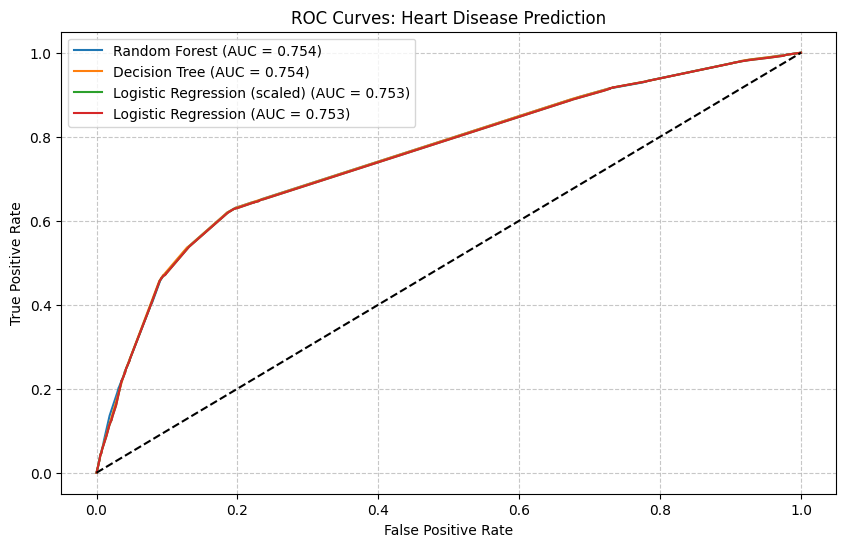

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = [rf, clf, log_reg_scaled, log_reg]  # Exclude linear regression
labels = ['Random Forest', 'Decision Tree', 'Logistic Regression (scaled)', 'Logistic Regression']

plt.figure(figsize=(10, 6))
for model, label in zip(models, labels):
    X_eval = X_test_scaled if label.endswith('(scaled)') else X_test  # Auto-handle scaling
    y_pred_prob = model.predict_proba(X_eval)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Heart Disease Prediction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

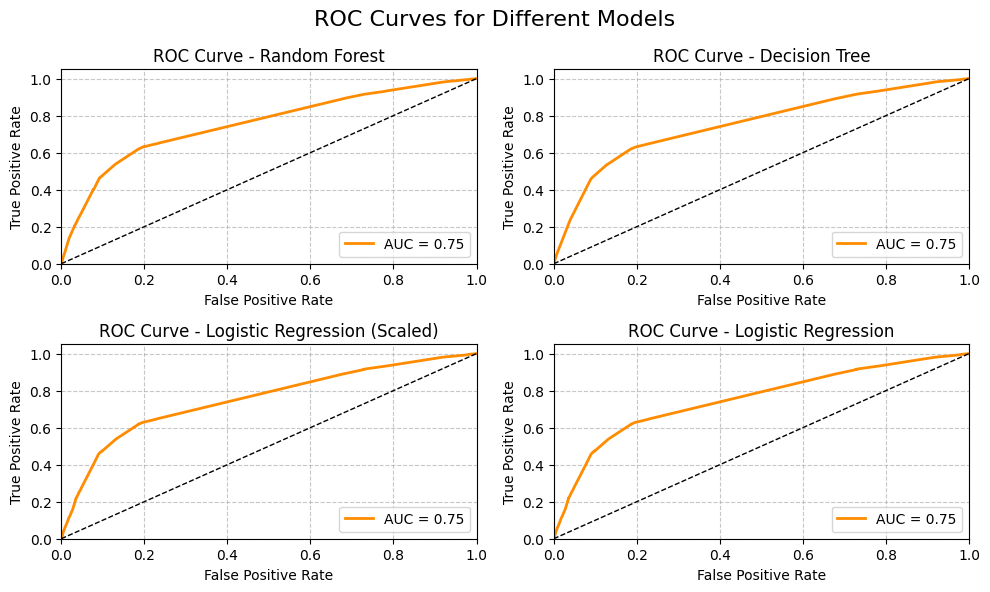

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# List of models and their names
models = [rf, clf, log_reg_scaled, log_reg]
model_names = ['Random Forest', 'Decision Tree', 
               'Logistic Regression (Scaled)', 'Logistic Regression']

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('ROC Curves for Different Models', fontsize=16)

# Flatten axes for easy iteration
axes = axes.ravel()

# Plot ROC curve for each model in separate subplot
for idx, (model, name) in enumerate(zip(models, model_names)):
    # Select appropriate test data (scaled or unscaled)
    X_eval = X_test_scaled if 'Scaled' in name else X_test
    
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_eval)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    axes[idx].plot(fpr, tpr, color='darkorange', lw=2, 
                  label=f'AUC = {auc:.2f}')
    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve - {name}')
    axes[idx].legend(loc="lower right")
    axes[idx].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()